# Construction of a single Perceptron with two INPUT and one OUTPUT without non-linearity (from SCRATCH)

Written By- Abirlal Metya (14-02-2021)

Import Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def lin_per(input_set,lr = 0.05,epoch=1000,save='No'):
    
    loss = pd.DataFrame([])
    np.random.seed(42)
    weights = np.random.rand(input_set.shape[1],1)
    bias    = np.random.rand(1)
    lr      = lr #learning rate

    for epoch in range(epoch):
        inputs = input_set
        ######################################
        XW     = np.dot(inputs, weights)
        z      = XW + bias
        y_cap   = z*1
        #####################################    
        error  = y_cap - y
        error1 = (y-y_cap)**2
        ######################################
        dcdw1  = error*1
        dcdw2  = np.dot(input_set.T,dcdw1)
        ######################################
        weights = weights - (lr*dcdw2)

        for num in dcdw1:
            bias = bias - lr*num
            
        if (save=='Yes'):
            ll = pd.DataFrame({'w1':[weights[0][0]],'w2':[weights[1][0]],'loss':[error.sum()]})
            loss = loss.append(ll,0)
            
        print(error1.sum())
    if (save=='No'):
        return weights,bias
    if (save=='Yes'):
               
        return weights,bias,loss

# Section-1

### 1st Approach

#### Set INPUT and LABELS for Training

In [3]:
### Create (x1,x2) array
input_set = np.array([[[0.1,0.2]], [[.2,.3]], [[.2,.4]], [[.1,.3]], [[0.3,0.4]], [[0.2,0.4]], [[0.3,0.5]]])

### Y = x1+x2
labels    = np.array([[[.3]], [[.5]], [[0.6]], [[0.4]],[[0.7]],[[0.6]],[[0.8]]])

input_set = input_set.reshape(7,2)
labels    = labels.reshape(7,1)

y = labels.copy()

#### Intialization of the model

In [4]:
np.random.seed(42)
weights = np.random.rand(input_set.shape[1],1)
bias    = np.random.rand(1)
lr      = 0.05 #learning rate

##### Construction

In [5]:
for epoch in range(1000):
    inputs = input_set
    ######################################
    XW     = np.dot(inputs, weights)
    z      = XW + bias
    y_cap   = z*1
    #####################################    
    error  = y_cap - y
    error1 = (y-y_cap)**2
    ######################################
    dcdw1  = error*1
    dcdw2  = np.dot(input_set.T,dcdw1)
    ######################################
    weights = weights - (lr*dcdw2)
    
    for num in dcdw1:
        bias = bias - lr*num
    print(error1.sum())

2.4491737752620475
0.8788697763068747
0.3307208617818894
0.1392615373054611
0.07227292442308206
0.04872060061917504
0.04032702340888958
0.03722453498188854
0.035969736434837425
0.03536101930327437
0.03497906375245011
0.0346775351483127
0.034405359040832424
0.03414470276799764
0.03388933369945163
0.03363706719271184
0.033387131253763365
0.03313924691625281
0.032893307332767484
0.03264926579091472
0.03240709663518534
0.03216678162980738
0.03192830519941737
0.03169165276771197
0.031456810177166616
0.031223763486003576
0.030992498896808628
0.03076300273109103
0.030535261419880007
0.030309261499921376
0.03008498961183245
0.029862432498943832
0.02964157700638543
0.02942241008026127
0.029204918766859232
0.028989090211876928
0.028774911659656857
0.028562370452428733
0.028351454029558167
0.02814214992680092
0.02793444577556341
0.027728329302168446
0.02752378832712692
0.027320810764414963
0.027119384620756637
0.02691949799491225
0.026721139076971854
0.0265242961476546
0.026328957577613093
0.0261

#### Prediction

In [6]:
## Provide test data
pred = np.array([[[0.4,0.5]], [[.1,.6]],[[0.3,0.6]], [[.4,.2]], [[.6,.1]]])

### Make prediction
mod_pred = np.dot(pred,weights)+bias

print('model prediction is ',mod_pred[:,0].T)

model prediction is  [[0.87898159 0.76162298 0.91735851 0.53024758 0.56973843]]


In [7]:
print('Updated weights are- w1 = ',np.round(weights[0,0],2),' and w2 = ',np.round(weights[1,0],2))
print('Updated bias is- = ',np.round(bias[0],2))

Updated weights are- w1 =  0.78  and w2 =  1.16
Updated bias is- =  -0.01


#### What goes wrong??

We have feed the INPUTS having first element is always smaller than second. While we provide dataset having first element is larger than second in last two combinations.

Hence, we got wrong prediction in last two combinations.

######################################################################################################
######################################################################################################
######################################################################################################
######################################################################################################

## 2nd Approach

In [8]:
input_set = np.array([[[0.1,0.2]], [[.3,.2]], [[.4,.2]], [[.1,.3]], [[0.4,0.3]], [[0.2,0.4]], [[0.5,0.3]]])

labels    = np.array([[[.3]], [[.5]], [[0.6]], [[0.4]],[[0.7]],[[0.6]],[[0.8]]])

input_set = input_set.reshape(7,2)
labels    = labels.reshape(7,1)

y = labels.copy()

In [9]:
weights,bias = lin_per(input_set=input_set)

2.0985749509288967
0.7975547217428971
0.3361942430351624
0.17212337840447434
0.11331717184604723
0.09178952080281734
0.0834699763468445
0.07983632084715277
0.07787115166923252
0.07650603425070258
0.07536256319708169
0.07430663802674378
0.07329065556746125
0.0722976385373517
0.07132145438213731
0.07035981177943185
0.06941178104501242
0.06847691621581165
0.06755494420293887
0.06664565471476679
0.06574886126247531
0.06486438733246908
0.06399206146936401
0.06313171551403565
0.06228318395900017
0.0614463036996717
0.06062091392606303
0.05980685606448857
0.05900397373724729
0.058212112728942285
0.057431120955419156
0.056660848433895544
0.0559011472537735
0.05515187154795035
0.054412877464560465
0.05368402313911924
0.05296516866705602
0.052256176076628746
0.051556909302213086
0.05086723415796082
0.050187018311822554
0.0495161312599294
0.04885444430132874
0.048201830513069116
0.04755816472562945
0.046923323498687795
0.04629718509722523
0.045679629467959594
0.045070538216105245
0.044469794582453

0.0001176481616665849
0.00011727407546482268
0.00011690119503634163
0.0001165295162704143
0.00011615903507337295
0.00011578974736849577
0.0001154216490958986
0.00011505473621243632
0.0001146890046915852
0.00011432445052334408
0.00011396106971412411
0.00011359885828665639
0.0001132378122798749
0.00011287792774882649
0.0001125192007645651
0.00011216162741405766
0.00011180520380007686
0.00011144992604111563
0.00011109579027127726
0.00011074279264019522
0.000110390929312922
0.00011004019646984871
0.00010969059030660971
0.00010934210703398645
0.00010899474287781605
0.00010864849407891266
0.00010830335689295926
0.00010795932759044334
0.0001076164024565439
0.0001072745777910638
0.0001069338499083392
0.00010659421513714841
0.00010625566982063521
0.00010591821031622414
0.00010558183299553246
0.00010524653424429762
0.00010491231046228692
0.00010457915806322457
0.0001042470734747074
0.00010391605313813026
0.00010358609350860298
0.00010325719105487504
0.00010292934225926671
0.00010260254361757706


In [10]:
print('Updated weights are- w1 = ',np.round(weights[0,0],2),' and w2 = ',np.round(weights[1,0],2))
print('Updated bias is- = ',np.round(bias[0],2))

Updated weights are- w1 =  1.0  and w2 =  0.95
Updated bias is- =  0.02


#### Prediction

In [11]:
pred = np.array([[[0.4,0.5]], [[.1,.6]],[[0.3,0.6]], [[.4,.2]], [[.6,.1]]])

mod_pred = np.dot(pred,weights)+bias

print('model prediction is ',mod_pred[:,0].T)

model prediction is  [[0.8872954  0.68284039 0.88219145 0.60358066 0.70836014]]


### 3rd Approach

###### Introduce more data in training

In [12]:
size = 500
radn = np.random.randint(100,500,size=size)/1000

input_set = radn.reshape(250,2)
labels    = input_set.sum(axis=1)

labels    = labels.reshape(labels.shape[0],1)
y         = labels.copy()

In [13]:
weights,bias = lin_per(lr=0.05,input_set=input_set)

71.98951201038031
13395.637523474212
2562356.602871116
490187736.3294798
93774658790.16144
17939426047307.25
3431876063968536.5
6.565301078965297e+17
1.2559654676928922e+20
2.402706649800188e+22
4.5964633530877075e+24
8.793198020255729e+26
1.6821700834727393e+29
3.2180512519020793e+31
6.156246601704797e+33
1.1777118900328522e+36
2.253004770050411e+38
4.3100783280096746e+40
8.245333272491462e+42
1.5773616069258185e+45
3.0175489052752272e+47
5.772678475085989e+49
1.1043339419773769e+52
2.11263014329778e+54
4.041536669948546e+56
7.731603521022215e+58
1.479083276684562e+61
2.8295389609925335e+63
5.413008758858528e+65
1.0355278449037929e+68
1.9810016302231498e+70
3.789726638699298e+72
7.24988196725979e+74
1.3869282286080261e+77
2.6532430734687478e+79
5.0757484502101355e+81
9.710087472735293e+83
1.8575742996930335e+86
3.553605761604999e+88
6.798174323901358e+90
1.30051494843588e+93
2.4879313923426284e+95
4.759501319418403e+97
9.105095453703675e+99
1.7418371727898958e+102
3.3321965178064795e+

C:\Users\Abir\anaconda3\envs\ai_ml\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\Abir\anaconda3\envs\ai_ml\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in square
C:\Users\Abir\anaconda3\envs\ai_ml\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in subtract



nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan

#### Whats Wrong??

In this case we have a 250 combinations of INPUT pairs. They are very closely spaced. Hence, previous lr(=0.05) is too high for update. Hence we need to decrease the lr for this case

In [14]:
weights,bias = lin_per(lr=0.005,input_set=input_set)

71.98951201038031
18.26051990017286
5.678348222905627
2.7014302604742197
1.9676137974718992
1.7584660732522268
1.6728561274287712
1.6171253845475988
1.5693832876143028
1.5244915037014404
1.4812226600770373
1.4392630405753903
1.398512961956709
1.3589234525364007
1.3204581097923964
1.2830841766215757
1.246770438121813
1.211486710935188
1.1772037048761756
1.1438929720038806
1.1115268766378195
1.0800785707800697
1.0495219713024009
1.019831738034013
0.9909832525341257
0.9629525974854327
0.9357165366802798
0.9092524955801442
0.8835385424314227
0.8585533699214393
0.8342762773591563
0.810687153365542
0.7877664590589776
0.7654952117215187
0.7438549689322271
0.7228278131541854
0.7023963367621916
0.6825436274985139
0.6632532543444233
0.6445092537956106
0.6262961165298976
0.6085987744560192
0.59140258813255
0.5746933345463762
0.5584571952404146
0.5426807447805737
0.5273509395522453
0.5124551068768843
0.4979809344395149
0.4839164600182607
0.470250061507245
0.4569704472244737
0.4440666464965287
0.43

2.7161532258774124e-05
2.6408088209146386e-05
2.567557355540071e-05
2.496340605050326e-05
2.4271019670702538e-05
2.359786416275245e-05
2.2943404603795194e-05
2.230712097354548e-05
2.168850773842407e-05
2.1087073447330208e-05
2.050234033870343e-05
1.9933843958586976e-05
1.9381132789324786e-05
1.8843767888689408e-05
1.832132253905026e-05
1.781338190636048e-05
1.7319542708696604e-05
1.6839412894014097e-05
1.6372611326938407e-05
1.591876748430375e-05
1.5477521159195736e-05
1.5048522173238626e-05
1.4631430096971641e-05
1.4225913977975404e-05
1.3831652076637648e-05
1.344833160928394e-05
1.3075648498471085e-05
1.2713307130269115e-05
1.2361020118326038e-05
1.2018508074488157e-05
1.1685499385877712e-05
1.1361729998153218e-05
1.104694320482148e-05
1.0740889442470419e-05
1.0443326091671757e-05
1.015401728347013e-05
9.87273371127282e-06
9.599252447973955e-06
9.333356768190911e-06
9.074835975481852e-06
8.823485234350964e-06
8.579105406967599e-06
8.341502894424275e-06
8.11048948245384e-06
7.88588219

9.218383224407227e-10
8.965324871111691e-10
8.7192178619678e-10
8.479871113944624e-10
8.247098800267842e-10
8.020720206272699e-10
7.800559588395556e-10
7.586446037433647e-10
7.378213345446332e-10
7.175699876056289e-10
6.97874843905313e-10
6.787206167317962e-10
6.600924399257441e-10
6.419758560905697e-10
6.243568055262292e-10
6.072216152011868e-10
5.905569880816255e-10
5.743499928805158e-10
5.585880538734993e-10
5.432589412053742e-10
5.283507613145814e-10
5.138519477591057e-10
4.997512520568154e-10
4.860377351035676e-10
4.72700758579496e-10
4.5972997665625295e-10
4.471153280006603e-10
4.348470278974317e-10
4.229155606651436e-10
4.113116722452421e-10
4.000263630225686e-10
3.8905088078578995e-10
3.7837671393295943e-10
3.6799558488478703e-10
3.5789944362068996e-10
3.4808046139750824e-10
3.3853102471224313e-10
3.29243729309451e-10
3.202113744937389e-10
3.1142695752449506e-10
3.0288366808779733e-10
2.945748831317984e-10
2.8649416160561246e-10
2.7863523950496226e-10
2.7099202499376506e-10
2.6

In [15]:
print('Updated weights are- w1 = ',np.round(weights[0,0],2),' and w2 = ',np.round(weights[1,0],2))
print('Updated bias is- = ',np.round(bias[0],2))

Updated weights are- w1 =  1.0  and w2 =  1.0
Updated bias is- =  0.0


#### Prediction

In [16]:
pred = np.array([[[0.4,0.5]], [[.1,.6]],[[0.3,0.6]], [[.4,.2]], [[.6,.1]]])

mod_pred = np.dot(pred,weights)+bias

print('model prediction is ',mod_pred[:,0].T)

model prediction is  [[0.89999996 0.70000017 0.90000004 0.59999992 0.69999978]]


## Great !!!!!! Prediction Improved.

##### Visualize the interplay between w1,w2 and loss

In [17]:
weights,bias, ll = lin_per(lr=0.005,input_set=input_set,save='Yes')

71.98951201038031
18.26051990017286
5.678348222905627
2.7014302604742197
1.9676137974718992
1.7584660732522268
1.6728561274287712
1.6171253845475988
1.5693832876143028
1.5244915037014404
1.4812226600770373
1.4392630405753903
1.398512961956709
1.3589234525364007
1.3204581097923964
1.2830841766215757
1.246770438121813
1.211486710935188
1.1772037048761756
1.1438929720038806
1.1115268766378195
1.0800785707800697
1.0495219713024009
1.019831738034013
0.9909832525341257
0.9629525974854327
0.9357165366802798
0.9092524955801442
0.8835385424314227
0.8585533699214393
0.8342762773591563
0.810687153365542
0.7877664590589776
0.7654952117215187
0.7438549689322271
0.7228278131541854
0.7023963367621916
0.6825436274985139
0.6632532543444233
0.6445092537956106
0.6262961165298976
0.6085987744560192
0.59140258813255
0.5746933345463762
0.5584571952404146
0.5426807447805737
0.5273509395522453
0.5124551068768843
0.4979809344395149
0.4839164600182607
0.470250061507245
0.4569704472244737
0.4440666464965287
0.43

4.134746933897157e-06
4.0203410999574695e-06
3.909104737253641e-06
3.800949923330067e-06
3.6957911781651564e-06
3.593545396224579e-06
3.4941317803911384e-06
3.397471777769464e-06
3.3034890172347095e-06
3.2121092487645457e-06
3.123260284431255e-06
3.0368719410518963e-06
2.9528759844281458e-06
2.871206075149257e-06
2.791797715897823e-06
2.7145882002174666e-06
2.6395165627238824e-06
2.5665235306859827e-06
2.495551476965496e-06
2.426544374260176e-06
2.3594477506324655e-06
2.2942086462594574e-06
2.230775571402761e-06
2.169098465539575e-06
2.1091286576383206e-06
2.050818827525858e-06
1.9941229683557593e-06
1.938996350094533e-06
1.8853954840382009e-06
1.8332780883170004e-06
1.782603054354028e-06
1.7333304142632566e-06
1.6854213091522954e-06
1.6388379583058815e-06
1.5935436292268348e-06
1.549502608517739e-06
1.5066801735623942e-06
1.4650425650023339e-06
1.4245569599743417e-06
1.385191446102278e-06
1.3469149961941314e-06
1.3096974436666235e-06
1.2735094586315117e-06
1.2383225246613056e-06
1.204

9.686172024648666e-11
9.420631272160555e-11
9.162374056514595e-11
8.91120048080222e-11
8.666916138325265e-11
8.429331960354821e-11
8.198264071389334e-11
7.973533643631743e-11
7.754966761466124e-11
7.542394283809376e-11
7.335651714603954e-11
7.13457907548998e-11
6.939020778480986e-11
6.748825510005533e-11
6.563846110093421e-11
6.38393945881316e-11
6.208966366723744e-11
6.038791464875427e-11
5.873283102148412e-11
5.7123132411026645e-11
5.555757359294743e-11
5.4034943529633197e-11
5.25540644327985e-11
5.1113790839491725e-11
4.9713008748067954e-11
4.835063471502686e-11
4.7025615064183406e-11
4.5736925017510926e-11
4.448356795047971e-11
4.3264574576405564e-11
4.207900222228643e-11
4.092593410083723e-11
3.980447856369836e-11
3.871376845983166e-11
3.765296042044617e-11
3.6621234247910553e-11
3.561779222369944e-11
3.464185855378449e-11
3.3692678713195225e-11
3.276951890011452e-11
3.187166544014963e-11
3.099842425119677e-11
3.014912029669414e-11
2.9323097061841987e-11
2.851971605691436e-11
2.77

Text(0, 0.5, 'W2')

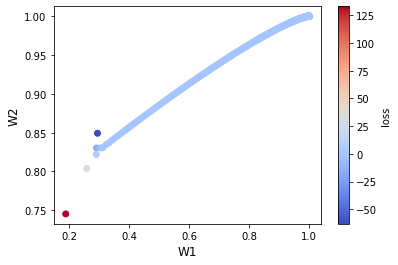

In [18]:
c1 = plt.scatter(ll.w1,ll.w2,c=ll.loss,cmap='coolwarm')
plt.colorbar(c1,label='loss')
plt.xlabel('W1',fontsize=12)
plt.ylabel('W2',fontsize=12)

In [19]:
###########################################################################################
###########################################################################################
###########################################################################################

In [20]:
size = 500
radn = np.random.randint(100,500,size=size)/1000

input_set = radn.reshape(250,2)

## y = (x1)+(2*x2)
labels    = input_set[:,0]+2*input_set[:,1]

labels    = labels.reshape(labels.shape[0],1)
y         = labels.copy()

In [21]:
weights,bias=lin_per(lr=0.005,input_set=input_set)

17.425019914238614
8.479410077354203
6.259547878536902
5.613484978621692
5.338586943766182
5.154032447462976
4.994164032927106
4.843548972338951
4.698480713430728
4.557992833671339
4.421761513396606
4.289615861330274
4.1614235317335675
4.0370639410250355
3.9164219335491675
3.7993862228570263
3.685848950040393
3.575705505126593
3.4688544121337737
3.3651972311769875
3.2646384666803554
3.16708547907704
3.0724483993242173
2.980640046016081
2.891575844986191
2.8051737513174295
2.7213541736858544
2.6400399009681657
2.5611560310450194
2.4846299017344107
2.410391023791407
2.338371015912381
2.268503541683774
2.200724248417196
2.134970707814418
2.071182358407504
2.0093004497209597
1.9492679881043669
1.8910296841855438
1.8345319018957
1.7797226090195792
1.7265513292249555
1.6749690955272027
1.6249284051460133
1.576383175712599
1.5292887027869784
1.4836016186461358
1.4392798523050385
1.396282590733618
1.3545702412339327
1.314104394942797
1.2748477914262097
1.2367642843328979
1.199818808075305
1.16

2.510160779897493e-09
2.4363494362917007e-09
2.364711625863049e-09
2.2951832578149325e-09
2.227702133794149e-09
2.162207891514882e-09
2.0986419507598377e-09
2.0369474607908446e-09
1.9770692490206643e-09
1.918953771395709e-09
1.8625490644564135e-09
1.8078046986107292e-09
1.7546717327640858e-09
1.7031026698836727e-09
1.6530514154486942e-09
1.6044732345522845e-09
1.557324713090586e-09
1.5115637176829533e-09
1.4671493585691214e-09
1.4240419524335234e-09
1.3822029868780817e-09
1.3415950858840573e-09
1.3021819762494616e-09
1.2639284547817542e-09
1.2268003570763813e-09
1.1907645266277177e-09
1.1557887849489204e-09
1.1218419027720705e-09
1.0888935721097133e-09
1.0569143789371262e-09
1.0258757769548938e-09
9.957500615721323e-10
9.665103454939281e-10
9.381305343305031e-10
9.105853033170451e-10
8.83850074520502e-10
8.579009946249423e-10
8.327149138840736e-10
8.082693651021398e-10
7.845425435058125e-10
7.615132873800905e-10
7.391610587108005e-10
7.174659251284941e-10
6.964085418695589e-10
6.759701

In [22]:
print('Updated weights are- w1 = ',np.round(weights[0,0],2),' and w2 = ',np.round(weights[1,0],2))
print('Updated bias is = ',np.round(bias[0],2))

Updated weights are- w1 =  1.0  and w2 =  2.0
Updated bias is =  0.0


### Introduce More-Complexity 

In [23]:
def compu(data):
    #return (data[:,0]*data[:,1])+((data[:,0]**2)*(data[:,1]**2))
    ## y = (x1**2)*(x2**2)
    return (data[:,0]**2)*(data[:,1]**2)

In [24]:
size = 500
radn = np.random.randint(100,700,size=size)/1000

input_set = radn.reshape(250,2)
#labels    = (input_set[:,0]*input_set[:,1])
labels    = compu(input_set)

labels    = labels.reshape(labels.shape[0],1)
y         = labels.copy()

In [25]:
weights,bias=lin_per(lr=0.0005,input_set=input_set)

376.8493817473169
263.79101364107817
184.79364878953407
129.59483528353573
91.02416566975211
64.07165364495933
45.236805933438944
32.073816768267136
22.873793850420142
16.442728630767242
11.946363450444418
8.80179972577513
6.601764247461896
5.061693806540998
3.982763056739298
3.226051966057633
2.694496534248468
2.3202777025598924
2.0560099454548713
1.8685847120313717
1.7348688192465813
1.6386989057785537
1.568781447515889
1.5172254917943095
1.4785174742040554
1.4488049198747013
1.425395963312148
1.4064096613342612
1.3905316656170221
1.3768435103307093
1.3647033348701614
1.3536625444464783
1.3434075805751498
1.3337192359275325
1.3244442274840118
1.3154753346010013
1.3067375214101185
1.2981782404890412
1.2897606580000316
1.2814589200671183
1.2732548453731583
1.2651356142612453
1.2570921540968647
1.249118011109656
1.241208562140038
1.2333604638784734
1.2255712680416162
1.2178391524891254
1.2101627333486191
1.2025409337413144
1.1949728920547784
1.1874578978474097
1.1799953470593343
1.17258

0.11581983096440347
0.11570488038907459
0.1155906933331472
0.1154772646652949
0.11536458928904149
0.11525266214252208
0.11514147819824576
0.11503103246286009
0.11492131997691724
0.11481233581464134
0.11470407508369815
0.11459653292496545
0.11448970451230596
0.11438358505234095
0.11427816978422597
0.11417345397942795
0.11406943294150393
0.113966102005881
0.11386345653963842
0.11376149194129033
0.11366020364057088
0.11355958709822017
0.11345963780577203
0.11336035128534311
0.11326172308942346
0.11316374880066868
0.11306642403169316
0.11296974442486524
0.11287370565210328
0.11277830341467357
0.11268353344298937
0.11258939149641148
0.11249587336304984
0.11240297485956718
0.1123106918309833
0.11221902015048117
0.11212795571921427
0.11203749446611502
0.11194763234770486
0.11185836534790547
0.11176968947785133
0.11168160077570352
0.11159409530646494
0.11150716916179657
0.11142081845983524
0.1113350393450126
0.11124982798787517
0.11116518058490582
0.1110810933583465
0.11099756255602186
0.11091

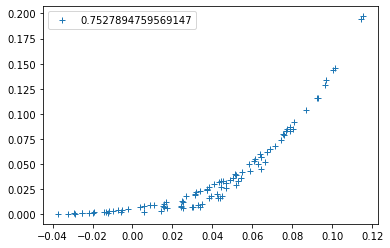

In [26]:
size = 200
radn = np.random.randint(100,700,size=size)/1000

pred = radn.reshape(100,2)

mod_pred = np.dot(pred,weights)+bias


plt.plot(mod_pred[:,0].T,compu(pred),'+',label=str(np.corrcoef(mod_pred[:,0].T,compu(pred))[0,1]**2))
plt.legend()

# Section-2

### Introduce non-linearity (Activation Function)

##### Contd. to MS-Word  (redo the math)

In [27]:
size = 500
radn = np.random.randint(100,700,size=size)/1000

input_set = radn.reshape(250,2)
#labels    = (input_set[:,0]*input_set[:,1])
labels    = compu(input_set)

labels    = labels.reshape(labels.shape[0],1)
y         = labels.copy()

In [28]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
    #return x
def sigmoid_derivative(x):
    #return 
    return sigmoid(x)*(1-sigmoid(x))

def ReLU(z) : 
    """ Reutrns the element wise ReLU function. """
    return np.maximum(0,z)
#    return (z*(z > 0))
def ReLU_prime(z) :
    """ Returns the derivative of the ReLU function. """
    return 1.0*(z>0)
    #return 1*(z>=0)
    
def tanh(z) :
    """ Reutrns the element wise hyperbolic tangent function. """
    return np.tanh(z)
def tanh_prime(z) : 
    """ Returns the derivative of the tanh function. """
    return (1-tanh(z)**2)

In [29]:
np.random.seed(42)
weights = np.random.rand(input_set.shape[1],1)
bias    = np.random.rand(1)
lr      = 0.005 #learning rate

In [30]:
for epoch in range(10000):
    inputs = input_set
    XW     = np.dot(inputs, weights)
    z      = XW + bias
    #y_cap  = sigmoid(z)
    #y_cap  = ReLU(z)
    y_cap  = tanh(z)


        
    error  = y_cap - y
    
    error1  = (y-y_cap)**2
    #dcdw1   = error*ReLU_prime(z)
    dcdw1   = error*tanh_prime(z)
    #dcdw1   = error*sigmoid_derivative(z)
    
    dcdw2   = np.dot(input_set.T,dcdw1)
    
    weights = weights - (lr*dcdw2)
    
    for num in dcdw1:
        bias = bias - lr*num
    print(error1.sum())

162.79193233447293
108.50742727749227
20.75769032002981
4.0835226832277565
2.336161226396004
1.7347408603330723
1.5004854162929135
1.3686427748872472
1.2732006161844018
1.1922606595265293
1.1191847456528428
1.051649717102871
0.9887404738087909
0.9299843746437924
0.8750603860394814
0.8237062138870161
0.7756878944300241
0.7307899216003046
0.6888113257889392
0.6495640489639295
0.6128718778090028
0.5785696920819732
0.5465027749414761
0.5165261977727895
0.4885042310015473
0.4623097930604147
0.4378239253027122
0.4149352968400229
0.39353973525538843
0.37353978378736163
0.3548442830627264
0.33736797683396436
0.32103114040358904
0.30575923084139195
0.29148255787435773
0.2781359744737698
0.2656585861128129
0.25399347773323044
0.24308745746637123
0.232890816197932
0.22335710209248724
0.21444290923266465
0.2061076795614563
0.19831351735344097
0.1910250154761099
0.18420909273860858
0.17783484166018138
0.1718733860251313
0.16629774762452973
0.1610827216173967
0.1562047599753705
0.15164186250502404
0

0.08468565499798522
0.08468565499798521
0.08468565499798521
0.08468565499798521
0.08468565499798522
0.08468565499798521
0.08468565499798521
0.08468565499798521
0.08468565499798521
0.08468565499798521
0.08468565499798522
0.0846856549979852
0.08468565499798521
0.08468565499798521
0.08468565499798521
0.08468565499798522
0.0846856549979852
0.08468565499798521
0.0846856549979852
0.08468565499798521
0.08468565499798522
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.08468565499798521
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.08468565499798521
0.08468565499798521
0.0846856549979852
0.0846856549979852
0.08468565499798521
0.0846856549979852
0.0846856549979852
0.08468565499798521
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.08468565499798521
0.0846856549979852
0.08468

0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549

0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549

0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549

0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549

0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549

0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549

0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549

0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549

0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549

0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549

0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549

0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549

0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549979852
0.0846856549

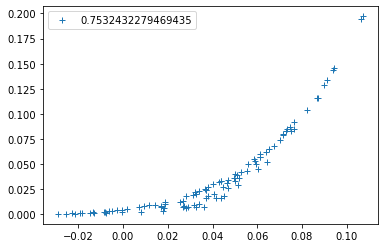

In [31]:
#pred = np.array([[0.4,0.5], [.1,.6],[0.3,0.6], [.4,.2], [.6,.1]])
size = 200
radn = np.random.randint(100,700,size=size)/1000

pred = radn.reshape(100,2)
#pred = pred.reshape(5,2)

mod_pred = np.dot(pred,weights)+bias


plt.plot(mod_pred[:,0].T,compu(pred),'+',label=str(np.corrcoef(mod_pred[:,0].T,compu(pred))[0,1]**2))
plt.legend()
#print('model prediction is ',mod_pred[:,0].T)
#print('output should be ',compu(pred))

Almost similar accuracy is found in both linear and non-linear perceptron.

#### So, Whats wrong??

I beleive that single non-linear/linear perceptron is too simple to handle this kind of problem. Hence, we should introduce more perceptrons in a layer.

#### Let's begin with Multi Layer Perceptron

Contd. to MS-word.